In [76]:
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import glob
import json
warnings.filterwarnings('ignore')

## This good city list are the cities that we want to complete the merge on

GOOD_CITY_LIST = ['arlington', 'atlanta','austin', 'bakersfield', 'baltimore', 'boston', 'chicago', 'dallas', 'denver', 'detroit', 'el-paso', 'fort-worth', 'fresno', 'houston', 'indianapolis', 'kansas-city', 'los-angeles', 'louisville', 'memphis', 'mesa', 'minneapolis', 'new-york-city', 'oklahoma-city', 'omaha', 'philadelphia', 'phoenix', 'portland', 'sacramento', 'san-antonio', 'san-diego', 'san-jose', 'seattle', 'tulsa', 'tuscon', 'washington-dc', 'wichita']

GOOD_CITY_SHAPEFILE_LOCATIONS = {
    "arlington": {"location" : "/tmp/data/boundary-shapefiles/city-boundaries/arlington/arlington-boundaries/arlington-boundaries.shp", "state": "texas"},
    "atlanta": {"location" : "/tmp/data/boundary-shapefiles/city-boundaries/atlanta/atlanta-boundaries/austin.shp", "state": "georgia"},
"austin": {"location" : "/tmp/data/boundary-shapefiles/city-boundaries/austin/austin-boundaries/austin.shp", "state": "texas"},
"bakersfield": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/bakersfield/bakersfield-boundaries/bakersfield-boundaries.shp", "state": "california"},
    "baltimore": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/baltimore/baltimore-boundaries/tl_2019_24510_faces.shp", "state": "maryland"},
    "boston": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/boston/boston-boundaries/City_of_Boston_Boundary.shp", "state": "massachusetts"},
    "chicago": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/chicago/chicago-boundaries/chicago_boundaries.shp", "state": "illinois"},
    "dallas": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/dallas/dallas-boundaries/dallas.shp", "state": "texas"},
    "denver": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/denver/denver-boundaries/county_boundary.shp", "state": "colorado"},
    "detroit": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/detroit/detroit-boundaries/City_of_Detroit_Boundary.shp", "state": "michigan"},
    "el-paso": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/el-paso/el-paso-boundaries/el_paso.shp", "state": "texas"},
    "fort-worth": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/fort-worth/fort-worth-boundaries/fort-worth-boundaries.shp", "state": "texas"},
"fresno": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/fresno/fresno-boundaries/fresno-boundaries.shp", "state": "california"},
    "houston": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/houston/houston-boundaries/houston.shp", "state": "texas"},
    "indianapolis": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/indianapolis/indianapolis-boundaries/Cities_and_Towns.shp", "state": "indiana"},
    "kansas-city": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/kansas-city/kansas-city-boundaries/kansas-city-boundaries.shp", "state": "missouri"},
    "los-angeles": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/los-angeles/los-angeles-boundaries/los-angeles-boundaries.shp", "state": "california"},
    "louisville": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/louisville/louisville boundaries/louisville_boundaries.shp", "state": "kentucky"},
    "memphis": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/memphis/memphis-boundaries/geo_export_8955b821-8b16-46ef-98ec-8ffbe9f68861.shp", "state": "tennessee"},
    "mesa": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/mesa/mesa-boundaries/mesa-boundaries.shp", "state": "arizona"},
    "minneapolis": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/minneapolis/minneapolis-boundaries/minneapolis-boundaries.shp", "state": "minnesota"},
    "new-york-city": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/new-york-city/nyc borough boundaries/nyc borough boundaries.shp", "state": "new-york"},
    "oklahoma-city": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/oklahoma-city/oklahoma-city-boundaries/oklahoma-city-boundaries.shp", "state": "oklahoma"},
    "omaha": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/omaha/omaha-boundaries/omaha-boundaries.shp", "state": "nebraska"},
    "philadelphia": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/philadelphia/philadelphia-boundaries/philadelphia-boundaries.shp", "state": "pennsylvania"},
    "phoenix": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/phoenix/phoenix boundaries/phoenix boundaries.shp", "state": "arizona"},
    "portland": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/portland/portland-boundaries/portland-boundaries.shp", "state": "oregon"},
    "sacramento": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/sacramento/sacramento-boundaries/sacramento-boundaries.shp", "state": "california"},
    "san-antonio": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/san-antonio/san-antonio-boundaries/san_antonio.shp", "state": "texas"},
    "san-diego": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/san-diego/san-diego-boundaries/san-diego-boundaries.shp", "state": "california"},
    "san-jose": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/san-jose/san-jose-boundaries/san-jose-boundaries.shp", "state": "california"},
    "seattle": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/seattle/seattle-boundaries/seattle-boundaries-v3.shp", "state": "washington"},
    "tulsa": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/tulsa/tulsa-boundaries/tulsa-boundaries.shp", "state": "oklahoma"},
    "tuscon": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/tuscon/tuscon-boundaries/tuscon-boundaries.shp", "state": "arizona"},
    "washington-dc": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/washington-dc/washington-dc-boundaries/washington-dc-boundaries.shp", "state": "dc"},
    "wichita": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/wichita/wichita-boundaries/wichita-boundaries.shp", "state": "kansas"}
}


# These city neighborhood shapefiles allow us to merge with the neighborhood boundary data
GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS = {
    "seattle": { "location" : "/tmp/data/boundary-shapefiles/neighborhood-boundaries/seattle/seattle_ccn/City_Clerk_Neighborhoods.shp", "nhood_col" : 'HOODS_'},
    "denver": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/denver/denver_1.0.32/statistical_neighborhoods.shp", "nhood_col": "NBHD_NAME"},
    "washington-dc": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/washington-dc/DC_shapefile/Neighborhood_Clusters.shp", "nhood_col": "NAME"},
    "boston": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/boston/Boston_Neighborhoods/Boston_Neighborhoods.shp", "nhood_col": "Name"},
     "portland": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/portland/portland-neighborhood-boundaries/Neighborhood_Boundaries.shp", "nhood_col": "ID"},
    "houston": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/houston/Houston/Houston.shp", "nhood_col": "SNBNAME"},
    "indianapolis": { "location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/indianapolis/Indy_Neighborhoods/Indy_Neighborhoods.shp", "nhood_col": "NAME"},
    "los-angeles": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/los-angeles/Los Angeles/Los Angeles.shp", "nhood_col": "display_na"},
    "phoenix": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/phoenix/phoenix/Villages.shp", "nhood_col": "NAME"},
    "san-francisco": { "location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/san-francisco/SF Find Neighborhoods/geo_export_f62da660-837f-478c-9ba4-ceb40e9ed8eb.shp", "nhood_col": "name"},
    "austin": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/austin/Neighborhoods/geo_export_81d98617-c469-49e1-9bf6-3ef25c07d0c6.shp", "nhood_col": "neighname"},
    "dallas": { "location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/dallas/Councils/Councils.shp", "nhood_col": "COUNCIL"},
    "san-jose": { "location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/san-jose/Zip_Code_Boundary/Zip_Code_Boundary.shp","nhood_col": "ZIPCODE"},
    "san-diego": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/san-diego/CommunityPlanningAreas/cmty_plan_datasd.shp","nhood_col": "cpname"},
    "baltimore": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/baltimore/neighborhoods/baltimore.shp","nhood_col": "Name"},
    "detroit": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/detroit/neighborhoods/detroit.shp", "nhood_col": "name"},
    "louisville": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/louisville/neighborhoods/louisville.shp", "nhood_col": "NH_NAME"},
    "new-york-city": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/new-york-city/nycd_22a/nycd.shp", "nhood_col": "BoroCD"},
    "chicago": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/chicago/neighborhoods/geo_export_24517513-d42b-43b9-a525-49bfe729d213.shp", "nhood_col": "pri_neigh" }
    }

# Read in the ACS columns of interest
FILE_2021 = open("/tmp/data/acs_data/2021_columns.json", "r")
COL_2021 = list(json.load(FILE_2021).values())
FILE_2017 = open("/tmp/data/acs_data/2017_columns.json", "r")
COL_2017 = list(json.load(FILE_2017).values())

# Read in the ACS_categories file for percentage calculation
ACS_CAT_FILE = open("/tmp/data/acs_data/acs_categories.json", "r")
ACS_CAT = json.load(ACS_CAT_FILE)
    

def merge_data(city_df, ctract_df,  merged_df_path):
    '''
    This function takes the city boundary data and census level data, merges them, and writes
    the merged df to a specified file location.
    
    Inputs:
      nhood_df: dataframe to go on outside (in this case neighborhood df)
      ctract_df: dataframe to go within the other df (census tract fcc_df)
      merged_df_path (str): Path to put the new merged dataframe
      nhood_col (str): String indicator of the name of the column for neighborhood IDs
    Returns:
      merged_df: merged dataframe, which this functions saves as csv to file location
    '''
    
    # get city into correct crs
    city_df = city_df.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
    
    # should work if geographies are in the same format
    merged_df = geopandas.sjoin(ctract_df, city_df, how="inner", op='intersects')
    #merged_df = merged_df.drop_duplicates(subset='GEOID', keep=False)
    merged_df.rename(columns={"TRACTCE":"tract"}, inplace = True)
    merged_df['tract'] = merged_df['tract'].astype(int)
    merged_df = merged_df.drop_duplicates(subset='GEOID', keep='first')
    merged_df.to_file(merged_df_path, driver="GeoJSON")
    return merged_df.copy()


def get_percentages(city_df, year):
    '''
    This function prepares a merged dataframe with ACS columns and computes
    the percentages of total households in each of the columns of interest
    
    Inputs:
      city_df: the standard city dataframe merge with ACS data
    
    Outputs:
      city_df_copy: The dataframe with columns for percentages added on
    '''
    
    percentages = {}
    
    city_df_copy = city_df.copy()
    
    if year == '2021':
        for col in COL_2021:
            if col == "Estimate!!Total: TOTAL POPULATION":
                continue
            if col in ACS_CAT.keys():
                total_est = ACS_CAT[col]
                curr_col_perc = city_df[col] / city_df[total_est]
                perc_key = f"PERC {col}"
                city_df_copy[perc_key] = curr_col_perc
    else:
        for col in COL_2017:
            if col == "Estimate!!Total: TOTAL POPULATION": #potentially skip over race columns here
                continue
            if col in ACS_CAT.keys():
                total_est = ACS_CAT[col]
                curr_col_perc = city_df[col] / city_df[total_est]
                perc_key = f"PERC {col}"
                city_df_copy[perc_key] = curr_col_perc
        
    return city_df_copy


def get_race_percentages(city_df):
    '''
    This function computes the proper percentages for the race columns and adds
    percentage columns to the dataframe
    
    Inputs:
      city_df: The ACS merged city-level dataframe
      
    Outputs:
      acs_df: The ACS merged city-level dataframe with race percentages
    '''
    # cleaning column names
    RACE_CAT_FILE = open("/tmp/lib/race_categories.json", "r")
    RACE_CAT = json.load(RACE_CAT_FILE)
    acs_df_clean = city_df.rename(columns=RACE_CAT)
    # applying cleaned column names to original dataset
    acs_df = acs_df_clean.copy()
    # cleaning column names v2 and conglomerating "Other" race
    acs_df['Hispanic (of any race)'] = acs_df['H/L']
    acs_df['Non-Hispanic White'] = acs_df['Not H/L: White alone']
    acs_df['Non-Hispanic Black'] = acs_df['Not H/L: Black alone']
    acs_df['Non-Hispanic Asian'] = acs_df['Not H/L: Asian alone']
    acs_df['Non-Hispanic American Indian'] = acs_df['Not H/L: American Indian/Native alone']
    acs_df['Non-Hispanic Other'] = acs_df['Not H/L: Native Hawaiian / PI alone'] + acs_df['Not H/L: Other race alone'] + acs_df['Not H/L: Two or more races']
    
    # creating total population column
    acs_df['Total Race Population'] = acs_df['H/L'] + acs_df['Not H/L: White alone'] + acs_df['Not H/L: Black alone'] + acs_df['Not H/L: Asian alone'] + acs_df['Not H/L: American Indian/Native alone'] + acs_df['Non-Hispanic Other']
    
    # creating race pct columns per census tract
    acs_df['% Hispanic (of any race)'] = ((acs_df['Hispanic (of any race)']/acs_df['Total Race Population']))
    acs_df['% Non-Hispanic White'] = ((acs_df['Non-Hispanic White']/acs_df['Total Race Population']))
    acs_df['% Non-Hispanic Black'] = ((acs_df['Non-Hispanic Black']/acs_df['Total Race Population']))
    acs_df['% Non-Hispanic Asian'] = ((acs_df['Non-Hispanic Asian']/acs_df['Total Race Population']))
    acs_df['% Non-Hispanic American Indian'] = ((acs_df['Non-Hispanic American Indian']/acs_df['Total Race Population']))
    acs_df['% Non-Hispanic Other'] = ((acs_df['Non-Hispanic Other']/acs_df['Total Race Population']))
    
    return acs_df
    
def get_standard_df(city_merged_df, year, city):
    '''
    This function prepares a merged dataframe into the standard format so it 
    is ready to go into the standard_censustract_dataframe
    
    Inputs:
      city_merged_df

    Outputs:
      city_standard_df
    '''
    if year == '2021':
        cols_of_int = ['tract', 'STATEFP', 'COUNTYFP', 'GEOID'] + ['geometry'] + COL_2021
    else:
        cols_of_int = ['tract', 'STATEFP', 'COUNTYFP', 'GEOID'] + ['geometry'] + COL_2017

    city_merged_df_copy = city_merged_df[cols_of_int]

    city_merged_df_copy.insert(0, 'City', city)
    city_merged_df_copy = city_merged_df_copy.rename({'STATEFP': 'State ID', 'COUNTYFP': 'County ID'}, axis='columns')
    
    # CALL TO RACE FUNCTION HERE!!
    city_merged_df_copy = get_race_percentages(city_merged_df_copy)
    
    #need to solve percentages issue still
    city_merged_df_copy = get_percentages(city_merged_df_copy, year)
    
    return city_merged_df_copy

    
    
def plot_boxplots(city_fcc_df, nhood_col, title):
    '''
    Plot basic boxplot for city_fcc_df.
    
    Inputs:
      city_fcc_df (Pandas): City fcc df (neighborhood data merged with FCC data)
      nhood_col (str): Column name for neighborhood indicators
      title (str): Title for boxplot figure
    
    Outputs:
      Boxplot
    '''
    
    city_fcc_df.boxplot(column='f_broadband', by='geoid', rot=90, figsize=(15,10), grid=False,
                       fontsize=8, color='green')
    plt.ylabel('f_broadband')
    plt.xlabel('Neighborhood Indicator')
    plt.title(title)
    plt.suptitle('')
    

def get_neighborhood_proportions(standard_city_df, city_nhood):
    '''
    Compute proportion of census tracts that overlap neighborhood and
    add a new column to the dataframe
    
    Inputs:
      standard_city_df (dataframe)
      city_nhood (dataframe)
      
    Outputs:
      ctract_overlaps (list)
    '''
    ctract_overlaps = []
    for index, ctract in standard_city_df.iterrows():
        if ctract['Neighborhood']:
            curr_nhood = city_nhood.loc[city_nhood['Neighborhood'] == ctract['Neighborhood']]
            curr_intersection = curr_nhood['geometry'].buffer(0).intersection(ctract['geometry'].buffer(0))
            overlap = curr_intersection.area / ctract['geometry'].area
            try:
                ctract_overlaps.append(overlap.item())
            except:
                ctract_overlaps.append(pd.NA)
        else:
            ctract_overlaps.append(pd.NA)
    
    return ctract_overlaps
    


def generate_dataframe_and_plots( city_name_str = None, year='2021'):
    '''
    THIS IS THE FUNCTION THAT SHOULD BE CALLED FROM OUTSIDE OF THE CODE
    This code creates a standard ACS dataframe for a group of cities of interest.
    For each city, it merges city boundary data, Census Tract TIGER data, ACS Data, 
    and city neighborhood boundaries data. It cleans this dataframe and computes percentages
    for given columns. It then combines all of the city-level merged dataframes into a single
    standard ACS dataframe which is written into the data folder of the repository in both 
    geojson and csv formats.
    
    Inputs:
      city_name_str (opt): if we want to only look at one city of interest
      year (opt): Year of 5 yr ACS merge to do
    
    Outputs:
      Displays maps of the TIGER-level census tracts for each city (for error checking)
      Write the standard ACS dataframes to files in the data folder
    '''
    
    if city_name_str is not None:
        city_name_list = [city_name_str]    
    else:
        city_name_list = GOOD_CITY_LIST

    # create list of standard city dataframes (to later be merged together into one)
    standard_city_dataframes = []
    
    # read in the data to be merged
    state_tiger_path = f"/tmp/data/TIGER-census-data/{year}/"
    acs_data = pd.read_csv(f'/tmp/data/acs_data/acs_5yr_{year}.csv')
    acs_data = acs_data.groupby('tract').mean().reset_index()
    
    # go through each city and compute the standard_city_df
    for idx, city in enumerate( city_name_list):
        print(f"Running {city}, {idx+1} of {len(city_name_list)}")
        # read in city boundary shapefile
        city_shapefile_df = geopandas.read_file(GOOD_CITY_SHAPEFILE_LOCATIONS[city]["location"])
        city_shapefile_df = city_shapefile_df.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})

        ### CREATE MERGED DATAFRAME
        ## "middle merge"
        # read in state data:
        state = GOOD_CITY_SHAPEFILE_LOCATIONS[city]["state"]
        state_tiger_shapefile_path = f"{state_tiger_path}{state}/{state}.shp"
        state_tiger_data = geopandas.read_file(state_tiger_shapefile_path)
        # merge city boundary data with TIGER data
        city_tiger_merge = merge_data(city_shapefile_df, state_tiger_data, f"/tmp/data/boundary-shapefiles/city-boundaries/{city}/city-tiger-merge-{year}.geojson")
        
        ## Initial Merge with ACS data
        # merge with ACS data
        city_acs_merge_df = city_tiger_merge.merge(acs_data, how='left', on='tract')
        # clean up standard dataframe data
        standard_city_df = get_standard_df(city_acs_merge_df, year, city)
        
        ## Merge with neighborhood boundaries (if we have data for them)
        if city in GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS.keys():
            city_nhood = geopandas.read_file(GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS[city]['location'])
            city_nhood.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
            standard_city_df.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
            city_nhood = city_nhood[[GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS[city]['nhood_col'], 'geometry']]
            city_nhood = city_nhood.rename({GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS[city]['nhood_col']: 'Neighborhood'}, axis='columns')
            if 'index_right' in standard_city_df.columns:
                standard_city_df = standard_city_df.drop('index_right', axis=1)
            standard_city_df = geopandas.sjoin(standard_city_df, city_nhood, how="left", op='intersects')
            nhood_overlaps = get_neighborhood_proportions(standard_city_df, city_nhood)
            standard_city_df['% of Tract within Neighborhood'] = nhood_overlaps
            if 'index_right' in standard_city_df.columns:
                standard_city_df = standard_city_df.drop('index_right', axis=1)
        else:
            standard_city_df['Neighborhood'] = pd.NA
            standard_city_df['% of Tract within Neighborhood'] = pd.NA
        
        ## save city merged dataframe to a file
        standard_city_df.to_file(f"/tmp/data/boundary-shapefiles/city-boundaries/{city}/city-acs-merge-{year}.geojson", driver="GeoJSON")
        
        
        ## add to the list of standard city dataframes
        standard_city_dataframes.append(standard_city_df)
        
        # produce plot of TIGER level data for error checkings               
        city_tiger_vis = city_tiger_merge.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', )
        cx.add_basemap(city_tiger_vis, crs=city_tiger_merge.crs, source=cx.providers.Stamen.TonerLite, zoom=12)
        city_tiger_vis.set_title(f"{city} {year} TIGER merge visualization")

        print("\n")
    
    # concatenate all of the standard city level dataframes into a single dataframe
    std_acs_censustract_df = pd.concat(standard_city_dataframes)
    std_acs_censustract_df.to_csv(f"/tmp/data/standard_dataframes/standard_acs_censustract_df_{year}.csv", index=False)
    std_acs_censustract_df.to_file(f"/tmp/data/standard_dataframes/standard_acs_censustract_df_{year}.geojson", driver="GeoJSON")

In [ ]:
generate_dataframe_and_plots( city_name_str = 'chicago', year='2021')

Running chicago, 1 of 1


In [ ]:
standard_city_df_2021 = pd.read_csv("/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.csv")
standard_city_df_2021

In [3]:
city_tiger_merge = geopandas.read_file("/tmp/data/boundary-shapefiles/city-boundaries/dallas/city-tiger-merge-2021.geojson")
city_tiger_merge.rename(columns={"TRACTCE":"tract"}, inplace = True)
city_tiger_merge['tract'] = city_tiger_merge['tract'].astype(int)

In [4]:
acs_data = pd.read_csv(f'/tmp/data/acs_data/acs_5yr_2021.csv')

In [5]:
acs_df = geopandas.read_file('/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson')

In [15]:
set(acs_df['City'])

{'austin',
 'boston',
 'chicago',
 'denver',
 'detroit',
 'el-paso',
 'houston',
 'indianapolis',
 'los-angeles',
 'louisville',
 'san-antonio',
 'seattle',
 'washington-dc'}

In [9]:
if 'index_right' in acs_df.columns:
    print('yes')

yes


In [6]:
city_acs_merge_df = city_tiger_merge.merge(acs_data, how='left', on='tract')

In [7]:
city_acs_merge_df

,STATEFP,COUNTYFP,tract,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE
0,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,0.0,2510.0,1220.0,1290.0,2510.0,1220.0,1290.0,2510.0,1220.0,1290.0
3,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,130.0,4779.0,2441.0,2338.0,4779.0,2441.0,2338.0,4779.0,2441.0,2338.0
8462,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,142.0,2374.0,996.0,1378.0,2374.0,996.0,1378.0,2374.0,996.0,1378.0
8463,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8464,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
city_nhood = geopandas.read_file("/tmp/data/boundary-shapefiles/neighborhood-boundaries/dallas/Councils/Councils.shp")

In [28]:
city_nhood

,OBJECTID,NAME,ACRES,URL,INSERT_DAT,UPDATE_DAT,ANID,geometry
0,16,Ahwatukee Foothills,22832.88,https://phoenix.gov/villages/Ahwatukee-Foothills,2022-05-05,2022-05-05,2445,"POLYGON ((683945.250 859952.062, 683930.250 85..."
1,17,Laveen,19579.69,https://phoenix.gov/villages/Laveen,2022-05-05,2022-05-05,2444,"POLYGON ((638589.250 843376.000, 629247.625 83..."
2,18,South Mountain,25481.86,https://phoenix.gov/villages/South-Mountain,2022-05-05,2022-05-05,2443,"POLYGON ((683945.250 859952.062, 683530.875 86..."
3,19,Estrella,26503.62,https://phoenix.gov/villages/Estrella,2022-05-05,2022-05-05,2442,"POLYGON ((607040.694 890232.667, 607046.417 89..."
4,20,Central City,13600.59,https://phoenix.gov/villages/Central-City,2022-05-05,2022-05-05,2441,"POLYGON ((669683.439 897001.625, 672160.625 89..."
5,21,Camelback East,23242.63,https://phoenix.gov/villages/Camelback-East,2022-05-05,2022-05-05,2437,"POLYGON ((676030.419 928829.819, 676010.366 92..."
6,22,Maryvale,20820.53,https://phoenix.gov/villages/Maryvale,2022-05-05,2022-05-05,2439,"POLYGON ((628339.375 913042.563, 628422.563 91..."
7,23,Encanto,6706.54,https://phoenix.gov/villages/Encanto,2022-05-05,2022-05-05,2440,"POLYGON ((654775.813 910355.439, 655131.188 91..."
8,24,Alhambra,12315.42,https://phoenix.gov/villages/Alhambra,2022-05-05,2022-05-05,2438,"POLYGON ((654743.250 928667.000, 654745.375 92..."
9,25,North Mountain,22212.33,https://phoenix.gov/villages/North-Mountain,2022-05-05,2022-05-05,2436,"POLYGON ((623225.438 944219.750, 623293.625 94..."


In [29]:
city_nhood = city_nhood[['NAME', 'geometry']]

In [30]:
city_nhood

,NAME,geometry
0,Ahwatukee Foothills,"POLYGON ((683945.250 859952.062, 683930.250 85..."
1,Laveen,"POLYGON ((638589.250 843376.000, 629247.625 83..."
2,South Mountain,"POLYGON ((683945.250 859952.062, 683530.875 86..."
3,Estrella,"POLYGON ((607040.694 890232.667, 607046.417 89..."
4,Central City,"POLYGON ((669683.439 897001.625, 672160.625 89..."
5,Camelback East,"POLYGON ((676030.419 928829.819, 676010.366 92..."
6,Maryvale,"POLYGON ((628339.375 913042.563, 628422.563 91..."
7,Encanto,"POLYGON ((654775.813 910355.439, 655131.188 91..."
8,Alhambra,"POLYGON ((654743.250 928667.000, 654745.375 92..."
9,North Mountain,"POLYGON ((623225.438 944219.750, 623293.625 94..."


In [11]:
city_acs_merge_df = city_acs_merge_df.drop('index_right', axis=1)

In [12]:
city_nhood_acs = geopandas.sjoin(city_acs_merge_df, city_nhood, how="left", op='intersects')

In [13]:
city_nhood_acs

,STATEFP,COUNTYFP,tract,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,index_right,COUNCIL,DISTRICT,COUNCILPER,COMMENTS,SHAPE_STAr,SHAPE_STLe
0,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,2510.0,1220.0,1290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,4779.0,2441.0,2338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8462,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,2374.0,996.0,1378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8463,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8464,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ACS_CAT

{'Estimate!!Total: SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male: SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!Under 5 year': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!5 to 9 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!10 to 14 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!15 to 17 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!18 and 19 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!20 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!21 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!22 to 24 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!25 to 29 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!30 to 34 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!35 to 

In [2]:
standard_city_df_2021 = pd.read_csv("/tmp/data/standard_acs_censustract_df_2021.csv")

In [4]:
standard_city_df_2021

,Unnamed: 0,City,tract,state,county,STATEFP,COUNTYFP,geometry,Estimate!!Total: TOTAL POPULATION,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,...,Estimate!!Total:!!Male: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,index_right,Neighborhood
0,0,boston,373100,25.000,17.0,25,17,"POLYGON ((-71.196879 42.354134, -71.1968629999...",4875.000,0.452939,...,2662.00,2204.000,4866.000,2662.00,2204.000,4866.000,2662.00,2204.000,17,Brighton
1,1,boston,373500,25.000,17.0,25,17,"POLYGON ((-71.199533 42.342215, -71.199506 42....",6081.000,0.504214,...,3000.00,3051.000,6051.000,3000.00,3051.000,6051.000,3000.00,3051.000,17,Brighton
2,2,boston,373600,25.000,17.0,25,17,"POLYGON ((-71.194791 42.330384, -71.194672 42....",6840.000,0.566716,...,2955.00,3865.000,6820.000,2955.00,3865.000,6820.000,2955.00,3865.000,17,Brighton
3,20,boston,806,10.250,57.0,25,25,"POLYGON ((-71.135452 42.364849, -71.135231 42....",4974.500,0.465122,...,2660.75,2313.750,4974.500,2660.75,2313.750,4974.500,2660.75,2313.750,17,Brighton
4,21,boston,102,22.825,95.3,25,25,"POLYGON ((-71.160899 42.358625, -71.160489 42....",3542.125,0.510843,...,1723.80,1800.225,3524.025,1723.80,1800.225,3524.025,1723.80,1800.225,17,Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336,147,washington-dc,9507,8.500,37.0,11,1,"POLYGON ((-77.002241 38.95687, -77.00141600000...",2816.000,0.520715,...,1313.00,1426.500,2739.500,1313.00,1426.500,2739.500,1313.00,1426.500,5,Cluster 19
13337,148,washington-dc,9508,11.000,1.0,11,1,"POLYGON ((-77.00905 38.953334, -77.009047 38.9...",3972.000,0.599194,...,1592.00,2380.000,3972.000,1592.00,2380.000,3972.000,1592.00,2380.000,5,Cluster 19
13338,149,washington-dc,9509,8.500,37.0,11,1,"POLYGON ((-77.002011 38.951051, -77.000646 38....",3989.500,0.492776,...,2001.00,1944.000,3945.000,2001.00,1944.000,3945.000,2001.00,1944.000,5,Cluster 19
13339,202,washington-dc,9510,8.500,37.0,11,1,"POLYGON ((-77.010862 38.944648, -77.010812 38....",4884.500,0.543530,...,2016.00,2400.500,4416.500,2016.00,2400.500,4416.500,2016.00,2400.500,5,Cluster 19


In [76]:
ACS_2017_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2017.geojson"

In [77]:
acs_2017_standard_df = geopandas.read_file(ACS_2017_MERGED_FILE)

In [6]:
GOOD_CITY_SHAPEFILE_LOCATIONS = {
    "seattle": { "location" : "/tmp/neighborhood-data/seattle/seattle_ccn/City_Clerk_Neighborhoods.shp", "nhood_col" : 'HOODS_'},
    "denver": {"location": "/tmp/neighborhood-data/denver/denver_1.0.32/statistical_neighborhoods.shp", "nhood_col": "NBHD_NAME"},
    "washington-dc": {"location": "/tmp/neighborhood-data/washington-dc/DC_shapefile/Neighborhood_Clusters.shp", "nhood_col": "NAME"},
    "boston": {"location": "/tmp/neighborhood-data/boston/Boston_Neighborhoods/Boston_Neighborhoods.shp", "nhood_col": "Name"},
     "portland": {"location": "/tmp/neighborhood-data/portland/portland-neighborhood-boundaries/Neighborhood_Boundaries.shp", "nhood_col": "ID"},
    "houston": {"location": "/tmp/neighborhood-data/houston/Houston/Houston.shp", "nhood_col": "SNBNAME"},
    "indianapolis": { "location": "/tmp/neighborhood-data/indianapolis/Indy_Neighborhoods/Indy_Neighborhoods.shp", "nhood_col": "NAME"},
    "los-angeles": {"location": "/tmp/neighborhood-data/los-angeles/Los Angeles/Los Angeles.shp", "nhood_col": "display_na"},
    "phoenix": {"location": "/tmp/neighborhood-data/phoenix/phoenix/Villages.shp", "nhood_col": "NAME"},
    "san-francisco": { "location": "/tmp/neighborhood-data/san-francisco/SF Find Neighborhoods/geo_export_f62da660-837f-478c-9ba4-ceb40e9ed8eb.shp", "nhood_col": "name"},
    "austin": {"location": "/tmp/neighborhood-data/austin/Neighborhoods/geo_export_81d98617-c469-49e1-9bf6-3ef25c07d0c6.shp", "nhood_col": "neighname"},
    "dallas": { "location": "/tmp/neighborhood-data/dallas/Councils/Councils.shp", "nhood_col": "COUNCIL"},
    "san-jose": { "location": "/tmp/neighborhood-data/san-jose/Zip_Code_Boundary/Zip_Code_Boundary.shp","nhood_col": "ZIPCODE"},
    "san-diego": {"location": "/tmp/neighborhood-data/san-diego/CommunityPlanningAreas/cmty_plan_datasd.shp","nhood_col": "cpname"},
    "baltimore": {"location": "/tmp/neighborhood-data/baltimore/neighborhoods/baltimore.shp","nhood_col": "Name"},
    "detroit": {"location": "/tmp/neighborhood-data/detroit/neighborhoods/detroit.shp", "nhood_col": "name"},
    "louisville": {"location": "/tmp/neighborhood-data/louisville/neighborhoods/louisville.shp", "nhood_col": "NH_NAME"},
    "new-york-city": {"location": "/tmp/neighborhood-data/new-york-city/nycd_22a/nycd.shp", "nhood_col": "BoroCD"},
    "chicago": {"location": "/tmp/neighborhood-data/chicago/neighborhoods/geo_export_24517513-d42b-43b9-a525-49bfe729d213.shp", "nhood_col": "pri_neigh" }
    }

In [7]:
for city in set(acs_2021_standard_df['City']):
    if city in GOOD_CITY_SHAPEFILE_LOCATIONS.keys():
        ## do merge
        print(city + ": in neighborhoods")
    else:
        ## go through and add NA's to city column
        print(city + ": not in neighborhood")

detroit: in neighborhoods
new-york-city: in neighborhoods
phoenix: in neighborhoods
chicago: in neighborhoods
los-angeles: in neighborhoods
seattle: in neighborhoods
houston: in neighborhoods
louisville: in neighborhoods
denver: in neighborhoods
washington-dc: in neighborhoods
indianapolis: in neighborhoods
boston: in neighborhoods
portland: in neighborhoods
san-jose: in neighborhoods
san-diego: in neighborhoods


In [78]:
chicago = acs_2017_standard_df[acs_2021_standard_df['City'] == 'chicago']

In [79]:
int_cols = ["tract",
            "Estimate!!Total: TOTAL POPULATION",
    "Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Dial-up with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Broadband of any type: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Cellular data plan: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Cellular data plan!!Cellular data plan with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Satellite Internet service: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Satellite Internet service!!Satellite Internet service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Other service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!Internet access without a subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
           "geometry"]

In [80]:
chicago_int = chicago[int_cols]

In [81]:
chicago_int['w/ int %'] = chicago_int["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"] / chicago_int["Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]

In [82]:
chicago_int

,tract,Estimate!!Total: TOTAL POPULATION,Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Dial-up with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Broadband of any type: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Cellular data plan: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Cellular data plan!!Cellular data plan with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,"Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD","Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",Estimate!!Total:!!With an Internet subscription!!Satellite Internet service: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Satellite Internet service!!Satellite Internet service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Other service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!Internet access without a subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,geometry,w/ int %
240,835600,910.000000,343.000000,143.000000,0.000000,143.000000,90.000000,36.000000,107.000000,53.000000,0.000000,0.000000,0.000000,3.000000,197.000000,"POLYGON ((-87.63581 41.80905, -87.63577 41.809...",0.416910
241,840000,2930.500000,906.000000,752.000000,6.000000,746.000000,525.500000,100.500000,616.500000,196.500000,31.500000,15.000000,0.000000,3.000000,151.000000,"POLYGON ((-87.64142 41.83811, -87.64117 41.838...",0.830022
242,836400,3308.000000,1612.000000,1109.000000,0.000000,1109.000000,904.000000,124.000000,966.000000,189.000000,37.000000,0.000000,0.000000,68.000000,435.000000,"POLYGON ((-87.60686 41.82313, -87.60681 41.823...",0.687965
243,835700,592.000000,202.000000,130.000000,0.000000,130.000000,130.000000,0.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,"POLYGON ((-87.62913 41.81645, -87.62893 41.816...",0.643564
244,836100,2163.000000,743.000000,423.000000,0.000000,423.000000,322.000000,52.000000,354.000000,79.000000,28.000000,17.000000,0.000000,97.000000,223.000000,"POLYGON ((-87.62883 41.80189, -87.62880 41.801...",0.569314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,4602,4081.500000,1394.500000,1065.500000,9.666667,1055.833333,713.500000,129.333333,850.166667,304.666667,104.500000,21.666667,2.333333,82.666667,246.333333,"POLYGON ((-105.03907 39.68425, -105.03906 39.6...",0.764073
1105,4603,5152.250000,1589.000000,1289.250000,2.500000,1286.750000,784.000000,86.500000,1110.000000,418.250000,115.000000,35.000000,23.500000,87.250000,212.500000,"POLYGON ((-105.03868 39.66823, -105.03867 39.6...",0.811359
1106,4700,4957.222222,2111.444444,1733.555556,6.222222,1727.333333,1235.333333,162.333333,1514.666667,465.777778,62.222222,10.333333,2.111111,115.444444,262.444444,"POLYGON ((-105.06262 39.67928, -105.06208 39.6...",0.821028
1107,7801,3667.500000,1388.000000,1024.000000,6.500000,1017.500000,667.250000,126.750000,852.250000,344.750000,48.500000,5.500000,0.000000,29.000000,335.000000,"POLYGON ((-104.88465 39.74379, -104.88465 39.7

In [74]:
max(chicago_int['w/ int %'])
min(chicago_int['w/ int %'])

0.25630810092961487

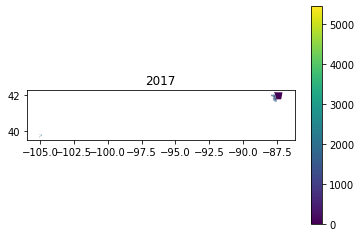

In [83]:
so.simple_map(chicago_int.drop_duplicates(subset='tract',keep='first'),  "Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD", 
                  'tract', '2017', f"/tmp/visualizations/chicago-acs-internet-tract-2017.png")

In [23]:
GOOD_CITY_SHAPEFILE_LOCATIONS = {
    "seattle": { "location" : "/tmp/neighborhood-data/seattle/seattle_ccn/City_Clerk_Neighborhoods.shp", "nhood_col" : 'HOODS_'},
    "denver": {"location": "/tmp/neighborhood-data/denver/denver_1.0.32/statistical_neighborhoods.shp", "nhood_col": "NBHD_NAME"},
    "washington-dc": {"location": "/tmp/neighborhood-data/washington-dc/DC_shapefile/Neighborhood_Clusters.shp", "nhood_col": "NAME"},
    "boston": {"location": "/tmp/neighborhood-data/boston/Boston_Neighborhoods/Boston_Neighborhoods.shp", "nhood_col": "Name"},
     "portland": {"location": "/tmp/neighborhood-data/portland/portland-neighborhood-boundaries/Neighborhood_Boundaries.shp", "nhood_col": "ID"},
    "houston": {"location": "/tmp/neighborhood-data/houston/Houston/Houston.shp", "nhood_col": "SNBNAME"},
    "indianapolis": { "location": "/tmp/neighborhood-data/indianapolis/Indy_Neighborhoods/Indy_Neighborhoods.shp", "nhood_col": "NAME"},
    "los-angeles": {"location": "/tmp/neighborhood-data/los-angeles/Los Angeles/Los Angeles.shp", "nhood_col": "display_na"},
    "phoenix": {"location": "/tmp/neighborhood-data/phoenix/phoenix/Villages.shp", "nhood_col": "NAME"},
    "san-francisco": { "location": "/tmp/neighborhood-data/san-francisco/SF Find Neighborhoods/geo_export_f62da660-837f-478c-9ba4-ceb40e9ed8eb.shp", "nhood_col": "name"},
    "austin": {"location": "/tmp/neighborhood-data/austin/Neighborhoods/geo_export_81d98617-c469-49e1-9bf6-3ef25c07d0c6.shp", "nhood_col": "neighname"},
    "dallas": { "location": "/tmp/neighborhood-data/dallas/Councils/Councils.shp", "nhood_col": "COUNCIL"},
    "san-jose": { "location": "/tmp/neighborhood-data/san-jose/Zip_Code_Boundary/Zip_Code_Boundary.shp","nhood_col": "ZIPCODE"},
    "san-diego": {"location": "/tmp/neighborhood-data/san-diego/CommunityPlanningAreas/cmty_plan_datasd.shp","nhood_col": "cpname"},
    "baltimore": {"location": "/tmp/neighborhood-data/baltimore/neighborhoods/baltimore.shp","nhood_col": "Name"},
    "detroit": {"location": "/tmp/neighborhood-data/detroit/neighborhoods/detroit.shp", "nhood_col": "name"},
    "louisville": {"location": "/tmp/neighborhood-data/louisville/neighborhoods/louisville.shp", "nhood_col": "NH_NAME"},
    "new-york-city": {"location": "/tmp/neighborhood-data/new-york-city/nycd_22a/nycd.shp", "nhood_col": "BoroCD"},
    "chicago": {"location": "/tmp/neighborhood-data/chicago/neighborhoods/geo_export_24517513-d42b-43b9-a525-49bfe729d213.shp", "nhood_col": "pri_neigh" }
    }

In [25]:
chi_nhood = geopandas.read_file(GOOD_CITY_SHAPEFILE_LOCATIONS['chicago']['location'])

In [42]:
city_nhood = chi_nhood.rename({GOOD_CITY_SHAPEFILE_LOCATIONS['chicago']['nhood_col']: 'Neighborhood'}, axis='columns')

In [43]:
city_nhood

,Neighborhood,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((-87.62761 41.87437, -87.62760 41.873..."
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"POLYGON ((-87.65833 41.92166, -87.65835 41.922..."
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((-87.74060 41.88782, -87.74060 41.887..."
...,...,...,...,...,...
93,Belmont Cragin,"BELMONT CRAGIN,HERMOSA",1.090994e+08,43311.706886,"POLYGON ((-87.74143 41.91698, -87.74141 41.916..."
94,Austin,AUSTIN,1.700378e+08,55473.345911,"POLYGON ((-87.75620 41.91547, -87.75588 41.915..."
95,Gold Coast,GOLD COAST,7.165706e+06,13685.479377,"POLYGON ((-87.62646 41.91147, -87.62640 41.911..."
96,Boystown,BOYSTOWN,3.365779e+06,9780.268985,"POLYGON ((-87.64878 41.93999, -87.64927 41.939..."


In [27]:
merged_df = geopandas.sjoin(chicago, chi_nhood, how="inner", op='intersects')

In [32]:
merged_df.drop_duplicates(subset='tract', keep='first')

,City,tract,state,county,STATEFP,COUNTYFP,Estimate!!Total: TOTAL POPULATION,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,...,Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,geometry,index_right,pri_neigh,sec_neigh,shape_area,shape_len
240,chicago,221000,32.500000,116.000000,17,031,3242.000000,0.528532,0.471468,1.000000,...,1713.500000,3242.000000,1528.500000,1713.500000,"POLYGON ((-87.71699 41.92460, -87.71675 41.924...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
241,chicago,221100,29.000000,85.000000,17,031,4918.500000,0.500559,0.488767,0.989326,...,2462.000000,4866.000000,2404.000000,2462.000000,"POLYGON ((-87.71374 41.92464, -87.71366 41.924...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
258,chicago,831200,17.000000,31.000000,17,031,4855.000000,0.483831,0.516169,1.000000,...,2349.000000,4855.000000,2506.000000,2349.000000,"POLYGON ((-87.74142 41.91698, -87.74138 41.916...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
266,chicago,832400,21.500000,73.000000,17,031,3845.500000,0.518918,0.473931,0.992849,...,1995.500000,3818.000000,1822.500000,1995.500000,"POLYGON ((-87.69720 41.91749, -87.69696 41.917...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
372,chicago,200402,17.000000,31.000000,17,031,5179.000000,0.506468,0.493532,1.000000,...,2623.000000,5179.000000,2556.000000,2623.000000,"POLYGON ((-87.73395 41.91891, -87.73371 41.918...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,chicago,740200,28.000000,130.600000,17,031,4100.800000,0.515217,0.473956,0.989173,...,2112.800000,4056.400000,1943.600000,2112.800000,"POLYGON ((-87.72113 41.71317, -87.72088 41.713...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539
744,chicago,740300,30.333333,201.666667,17,031,2919.666667,0.476196,0.523804,1.000000,...,1390.333333,2919.666667,1529.333333,1390.333333,"POLYGON ((-87.72064 41.69857, -87.72043 41.698...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539
745,chicago,740400,29.666667,171.666667,17,031,5284.666667,0.339283,0.304844,0.644128,...,1793.000000,3404.000000,1611.000000,1793.000000,"POLYGON ((-87.73973 41.69089, -87.73949 41.690...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539
862,chicago,823200,17.000000,31.000000,17,031,4753.000000,0.512729,0.487271,1.000000,...,2437.000000,4753.000000,2316.000000,2437.000000,"POLYGON ((-87.77857 41.68297, -87.77749 41.682...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539


In [37]:
pd.NA

<NA>